<a href="https://colab.research.google.com/github/FazleRabbbiferdaus172/Classifiers/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [2]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

#Mount Drive

In [30]:
drive.mount('/content/gdrive')
fruit_data_url = '/content/gdrive/My Drive/Data_set/fruit_data_with_colors.txt'
bank_note_url = '/content/gdrive/My Drive/Data_set/data_banknote_authentication.txt'
zoo_url = '/content/gdrive/My Drive/Data_set/zoo.data'
abalone_url = '/content/gdrive/My Drive/Data_set/abalone.data'
seed_url = '/content/gdrive/My Drive/Data_set/seeds_dataset.txt'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Loading Data


In [ ]:
fruits = pd.read_table(fruit_data_url)
banks = pd.read_csv(bank_note_url)
zoo = pd.read_csv(zoo_url)
abalone = pd.read_csv(abalone_url)
seed = pd.read_csv(seed_url,sep='\t',error_bad_lines=False)
#seed.head

#Adding the missing feature names

In [64]:
banks.columns = ['variance','skewness','curtosis', 'entropy','class']
zoo.columns = ['name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
abalone.columns = ['Sex' ,'Length' ,'Diameter' ,'Height' ,'Whole weight' ,'Shucked weight' ,'Viscera weight' ,'Shell weight' ,'Rings']
seed.columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'length', 'type']
#banks.head()
banks_c = banks.columns[:-1]
banks_l = banks.columns[-1]

zoo_c = zoo.columns[1:-1]
zoo_l = zoo.columns[-1]

abalone_c = abalone.columns[:-1]
abalone_l = abalone.columns[-1]

seed_c = seed.columns[:-1]
seed_l = seed.columns[-1]

#Categorical Variables to numerical variables

In [59]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
abalone['Sex'] = number.fit_transform(abalone['Sex'].astype('str'))
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


#Creating a mapping from label value to class name

In [ ]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

#Spliting training and test data

In [65]:
fruits_X = fruits[['height', 'width', 'mass', 'color_score']]
fruits_y = fruits['fruit_label']
fruits_X_train, fruits_X_test, fruits_y_train, fruits_y_test = train_test_split(fruits_X, fruits_y, random_state=0)


banks_X = banks[banks_c]
banks_y = banks[banks_l]
banks_X_train, banks_X_test, banks_y_train, banks_y_test = train_test_split(banks_X, banks_y, random_state=0)

zoo_X = zoo[zoo_c]
zoo_y = zoo[zoo_l]
zoo_X_train, zoo_X_test, zoo_y_train, zoo_y_test = train_test_split(zoo_X, zoo_y, random_state=0)

abalone_X = abalone[abalone_c]
abalone_y = abalone[abalone_l]
abalone_X_train, abalone_X_test, abalone_y_train, abalone_y_test = train_test_split(abalone_X, abalone_y, random_state = 0)

seed_X = seed[seed_c]
seed_y = seed[seed_l]
seed_X_tarin, seed_X_test, seed_y_train, seed_y_test = train_test_split(seed_X,seed_y, random_state=0)

#2D DATA visualization

In [ ]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
#scatter = scatter_matrix(fruits_X_train, c = fruits_y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9),cmap=cmap)
scatter = scatter_matrix(banks_X_train, c = banks_y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9),cmap=cmap)

#3D DATA VISUALIZATION

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(fruits_X_train['width'], fruits_X_train['height'], fruits_X_train['color_score'], c = fruits_y_train,marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

#Create classifier object

In [71]:
from sklearn.neighbors import KNeighborsClassifier

f_knn = KNeighborsClassifier(n_neighbors=3)
b_knn = KNeighborsClassifier(n_neighbors=3)
z_knn = KNeighborsClassifier(n_neighbors=3)
a_knn = KNeighborsClassifier(n_neighbors=12)
s_knn = KNeighborsClassifier(n_neighbors=5)

#Training the classifier

In [14]:
f_knn.fit(fruits_X_train,fruits_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
b_knn.fit(banks_X_train,banks_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
z_knn.fit(zoo_X_train,zoo_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [26]:
a_knn.fit(abalone_X_train,abalone_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [72]:
s_knn.fit(seed_X_tarin,seed_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#Accuracy of classifier using test set

In [15]:
f_knn.score(fruits_X_test,fruits_y_test)

0.5333333333333333

In [17]:
b_knn.score(banks_X_test,banks_y_test)

1.0

In [19]:
z_knn.score(zoo_X_test,zoo_y_test)

0.92

In [27]:
a_knn.score(abalone_X_test,abalone_y_test)

0.2768199233716475

In [73]:
s_knn.score(seed_X_test,seed_y_test)

0.96

#How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

([<matplotlib.axis.XTick at 0x7f338b331898>,
 <a list of 11 Text major ticklabel objects>)

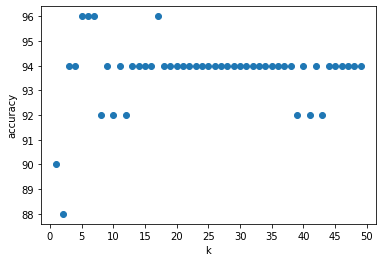

In [70]:
k_range = range(1,50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(seed_X_tarin, seed_y_train)
    scores.append(knn.score(seed_X_test,seed_y_test)*100)

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([int(x) for x in range(0,51,5)])